# Mass Transports

Transport diagnostics for flow through major straits.

## Theory

Formally, mass transports are given by
$$T_x = \rho u  $$
$$T_y = \rho v  $$

Mass transports are diagnostics that are calculated online by the model:

|--|
|variable|long name|units|dimensions|
|--|
|tx_trans|T-cell i-mass transport|Sv|(time,st_ocean,xu_ocean,yt_ocean)|
|ty_trans|T-cell j-mass transport|Sv|(time,st_ocean,xt_ocean,yu_ocean)|


These variables are saved in `ocean.nc` files.



## Calculation

In [1]:
%matplotlib inline

import cosima_cookbook as cc
import matplotlib.pyplot as plt

Use default database for this calculation

In [2]:
session = cc.database.create_session()

This dictionary defines a few key choke points that you might be interested in. For the purposes of demonstration we are just using Drake Passage in this example.

In [3]:
straights = { 'DrakePassage': [-69.9, -69.9, -71.6, -51.0],
              'Lombok':       [-244.6+360, -243.9+360, -8.6, -8.6],
              'Ombai' :       [-235.0+360, -235.0+360, -9.2, -8.1],
              'Timor' :       [-235.9+360, -235.9+360, -11.9, -9.9],
              'Bering' :      [-172, -167, 65.8, 65.8],
              'Denmark' :     [-42, -22, 65.8, 65.8],
            }

In [12]:
def calc_transport(expt, straight, n=24):
    """
    Calculate barotropic transport across a given 
     line of latitude or longitude.
     
    Designed for flow through straits.
    """
    
    print('Calculating {}:{} transport'.format(expt, straight))
    
    xmin, xmax, ymin, ymax = straights[straight]
    
    if xmin == xmax:                
        tx_trans = cc.querying.getvar(expt,'tx_trans',session)
        
        transport = tx_trans.sel(xu_ocean=xmin, method='nearest')\
                            .sel(yt_ocean=slice(ymin, ymax))\
                            .sum('st_ocean').sum('yt_ocean')/1e6/1036

    elif ymin == ymax:
        ty_trans = cc.querying.getvar(expt,'tx_trans',session)
        transport = ty_trans.sel(yu_ocean=ymin, method='nearest')\
                            .sel(xt_ocean=slice(xmin, xmax))\
                            .sum('st_ocean').sum('xt_ocean')/1e6/1036
    else:
        raise ValueError('Transports are computed only along lines of either constant latitude or longitude')
    
    transport = transport.compute()
       
    return transport

In [14]:
%%time
#expt = '025deg_jra55v13_ryf8485_gmredi6'
expt = '01deg_jra55v13_ryf8485_spinup6_000-413'
transport = calc_transport(expt, 'DrakePassage')

Calculating 01deg_jra55v13_ryf8485_spinup6_000-413:DrakePassage transport


/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.10/lib/python3.6/site-packages/xarray/coding/times.py:459: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.10/lib/python3.6/site-packages/cosima_cookbook/querying.py:134: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  **xr_kwargs
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.10/lib/python3.6/site-packages/xarray/backends/api.py:931: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` functi

CPU times: user 7min 46s, sys: 2min, total: 9min 46s
Wall time: 16min 25s


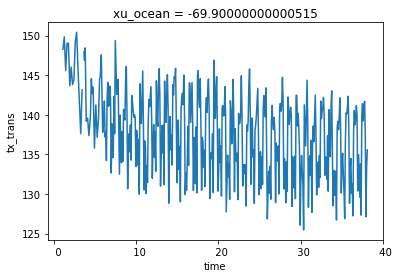

In [18]:
transport.plot(linestyle='-')